## DATA SETS

### FULL DATA DOWNLOAD AND COMPUTING

In [ ]:
!pip install lingam
!pip install tigramite
!pip install statsmodels

     |████████████████████████████████| 58 kB 2.7 MB/s 
     |████████████████████████████████| 420 kB 5.0 MB/s 


In [ ]:
# RUN For METHODS + BASELINE
# PLOT GRAPH (with graphviz)
!rm -f CAMMESA.tgz
!wget https://cs.uns.edu.ar/~mmaisonnave/resources/tesis/CAMMESA.tgz
!tar zxvf CAMMESA.tgz >> /dev/null
!ls -lh | grep csv

--2021-08-09 15:37:41--  https://cs.uns.edu.ar/~mmaisonnave/resources/tesis/CAMMESA.tgz
Resolving cs.uns.edu.ar (cs.uns.edu.ar)... 200.49.226.11
Connecting to cs.uns.edu.ar (cs.uns.edu.ar)|200.49.226.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1375608 (1.3M) [application/x-gzip]
Saving to: ‘CAMMESA.tgz’

CAMMESA.tgz         100%[===================>]   1.31M  1.32MB/s    in 1.0s    

2021-08-09 15:37:43 (1.32 MB/s) - ‘CAMMESA.tgz’ saved [1375608/1375608]

-rw-r--r-- 1 1000 1000 415K Jun  5 15:23 cammesa_daily.csv
-rw-r--r-- 1 1000 1000 5.9M Jun  5 15:24 cammesa_hourly.csv
-rw-r--r-- 1 1000 1000  15K Jun  5 15:24 cammesa_monthly.csv
-rw-r--r-- 1 1000 1000  63K Jun  5 15:24 cammesa_weekly.csv


In [ ]:
import pandas as pd
df = pd.read_csv('cammesa_daily.csv')



month2number = {
    'enero':1,
    'febrero':2,
    'marzo':3,
    'abril':4,
    'mayo':5,
    'junio':6,
    'julio':7,
    'agosto':8,
    'septiembre':9,
    'octubre':10,
    'noviembre':11,
    'diciembre':12
}
df
df['Date'] = [f'{row[3]}-{month2number[row[1]]}-{row[0]}' for row in df.values]
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
# df['Date'] = np.array([f'{year}-{month2number[month]}-01' for year,month in zip(df['Year'],df['Month'])])

#remove leap days
df = df[~((df['Month']=='febrero') & (df['Day']==29))]
# # # # # # # # # DUMMY # # # # # # # # # # #
# # # # # # # # # FIN DUMMY   # # # # # # # #
df['Summer']= df["Season"]=="Summer"
df['Autumn']= df["Season"]=="Autumn"
df['Spring']= df["Season"]=="Spring"


df['Monday']= df["Weekday"]=="Monday"
df['Tuesday']= df["Weekday"]=="Tuesday"
df['Wednesday']= df["Weekday"]=="Wednesday"
df['Thursday']= df["Weekday"]=="Thursday"
df['Friday']= df["Weekday"]=="Friday"
df['Saturday']= df["Weekday"]=="Saturday"


df['febrero']= df["Month"]=="febrero"
df['marzo']= df["Month"]=="marzo"
df['abril']= df["Month"]=="abril"
df['mayo']= df["Month"]=="mayo"
df['junio']= df["Month"]=="junio"
df['julio']= df["Month"]=="julio"
df['agosto']= df["Month"]=="agosto"
df['septiembre']= df["Month"]=="septiembre"
df['octubre']= df["Month"]=="octubre"
df['noviembre']= df["Month"]=="noviembre"
df['diciembre']= df["Month"]=="diciembre"
# # # # # # # # # FIN DUMMY   # # # # # # # #

dummies = df.iloc[:,16:].values
print(dummies.shape)
dummies
df.iloc[:,16:]

(2555, 20)


,Summer,Autumn,Spring,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,febrero,marzo,abril,mayo,junio,julio,agosto,septiembre,octubre,noviembre,diciembre
Date,,,,,,,,,,,,,,,,,,,,
2012-01-01,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2012-01-02,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2012-01-03,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2012-01-04,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2012-01-05,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-27,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
2018-12-28,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True
2018-12-29,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True


In [ ]:
import pandas as pd
df = pd.read_csv('cammesa_daily.csv')


month2number = {
    'enero':1,
    'febrero':2,
    'marzo':3,
    'abril':4,
    'mayo':5,
    'junio':6,
    'julio':7,
    'agosto':8,
    'septiembre':9,
    'octubre':10,
    'noviembre':11,
    'diciembre':12
}
df
df['Date'] = [f'{row[3]}-{month2number[row[1]]}-{row[0]}' for row in df.values]
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
# df['Date'] = np.array([f'{year}-{month2number[month]}-01' for year,month in zip(df['Year'],df['Month'])])

#remove leap days
df = df[~((df['Month']=='febrero') & (df['Day']==29))]


del df['Month']
del df['Year']



df['Summer'] = [1 if season=='Summer' else 0 for season in df['Season']]
df['Winter'] = [1 if season=='Winter'  else 0 for season in df['Season']]
df['isSpecialDay'] = [1 if isSpecial=="Y"  else 0 for isSpecial in df['isSpecialDay']]
df['isHoliday'] = [1 if isHoliday=="Y"  else 0 for isHoliday in df['isHoliday']]
df['isWeekend'] = [1 if weekday=="Sunday" or weekday=="Saturday"  else 0 for weekday in df['Weekday']]

del df["EMAE"]
del df['Season']
del df['Weekday']
del df['Day']
# del df['Hour']
# df = df[['Date', 'DemGBA', 'Temp', 'EMAE', 'vy', 'vx', 'Hum', 'Pres']]


df["Wrk"] = [0 if isWeek or isHol else 1 for isWeek,isHol in zip(df["isWeekend"], df["isHoliday"])]

del df["isSpecialDay"]
del df["isHoliday"]

# CLIMATE DATA
del df["vy"]
del df["vx"]
del df["Pres"]
del df["Ster"]
del df['GHI']

del df["Summer"]
del df["isWeekend"]
del df["Winter"]
df

,DemGBA,Temp,Hum,Wrk
Date,,,,
2012-01-01,99924.0,24.295833,0.635000,0
2012-01-02,134833.0,27.337500,0.575000,1
2012-01-03,137700.0,23.150000,0.665833,1
2012-01-04,132699.0,23.266667,0.601667,1
2012-01-05,144844.0,27.508333,0.490000,1
...,...,...,...,...
2018-12-27,165301.0,27.533333,0.682917,1
2018-12-28,161804.0,26.729167,0.684167,1
2018-12-29,139927.0,26.575000,0.730000,0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


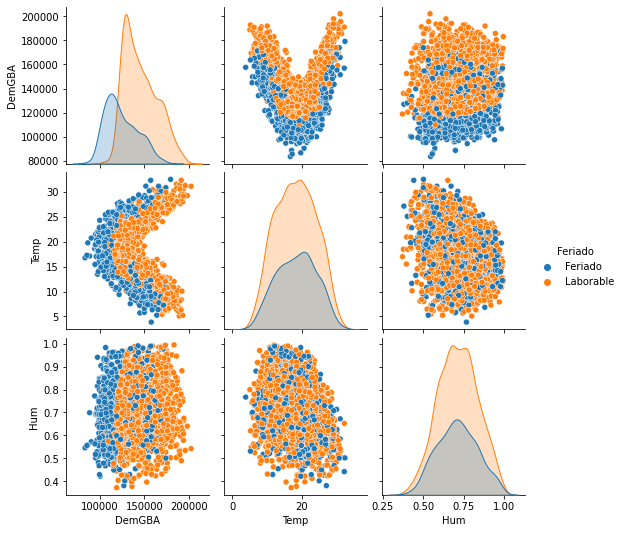

In [ ]:
import seaborn as sns
df_copy = df.copy()
df_copy["Feriado"] = "Feriado"
df_copy["Feriado"][df_copy["Wrk"]==1]="Laborable"
fig = sns.pairplot(df_copy[["DemGBA","Temp","Hum","Feriado"]],hue="Feriado")
fig.savefig('pairplot.png')
# from google.colab import drive
# drive.mount('/content/gdrive')
# !cp pairplot.png /content/gdrive/MyDrive/tmp_results_from_colab/CAMMESA/

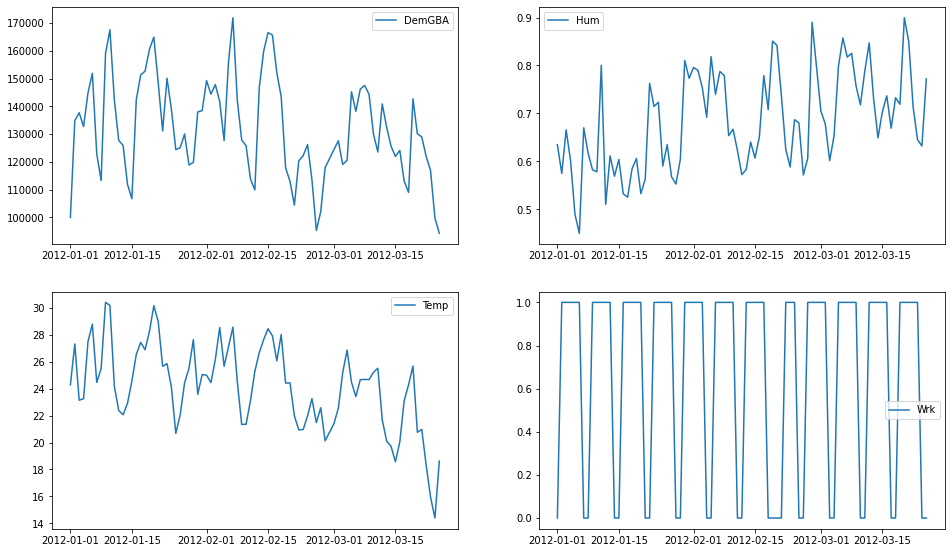

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
import math

matplotlib.rcParams['figure.figsize'] = 16, 9.6

def plot_df(df, filter_=None):
    T, var_count = df.shape

    fig,ax = plt.subplots(
        math.ceil(math.sqrt(var_count)),
        math.ceil(math.sqrt(var_count))
    )

    for idx in range(var_count):
        if filter_ is None:
            ax[idx%ax.shape[0],int(idx/ax.shape[0])].plot(df.iloc[:,idx], label=df.columns[idx])
        else:
            ax[idx%ax.shape[0],int(idx/ax.shape[0])].plot(filter_(df.iloc[:,idx]), label=df.columns[idx])
        ax[idx%ax.shape[0],int(idx/ax.shape[0])].legend()
plot_df(df.iloc[:84,:])

### TREND DATA COMPUTING (EL QUE TIENE MEJOR F1 en promedio)


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


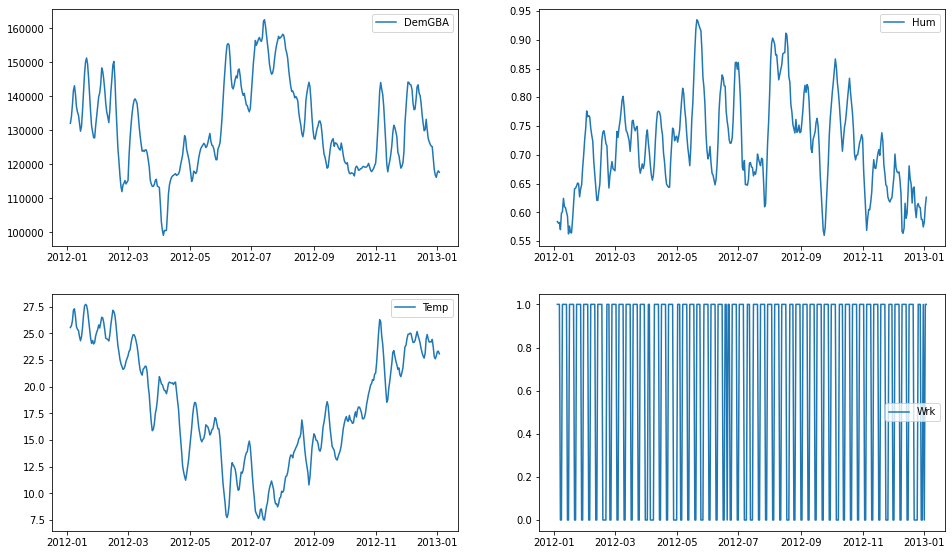

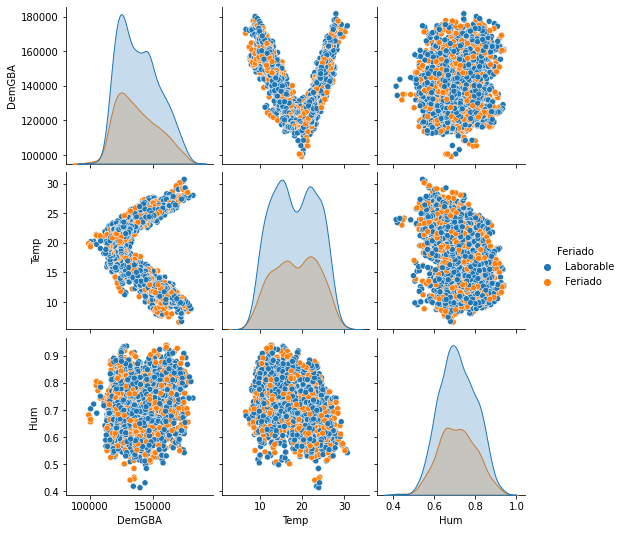

In [ ]:
# %%time
# import statsmodels.api as sm
# from statsmodels.tsa.seasonal import STL
#plot_df(df, lambda x : STL(x).fit().trend) #trend
from statsmodels.tsa.seasonal import seasonal_decompose
import os
# import statsmodels.api as sm
!rm -f df_trend.csv
if os.path.isfile("df_trend.csv"):
  df_trend = pd.read_csv("df_trend.csv")
else:
  df_trend = df.copy()
  for column in df_trend.columns:
    if column!='Wrk':
      df_trend[column] = seasonal_decompose(df_trend[column], freq=7).trend # seasonal_decompose((df_trend[column]).fit().trend
  # plot_df(df_trend)
  df_trend = df_trend.dropna()
  df_trend.to_csv("df_trend.csv",index=False)

plot_df(df_trend.iloc[:365,:])



import seaborn as sns
df_copy = df_trend.copy()
df_copy["Feriado"] = "Feriado"
df_copy["Feriado"][df_copy["Wrk"]==1]="Laborable"
fig = sns.pairplot(df_copy[["DemGBA","Temp","Hum","Feriado"]],hue="Feriado")

### TREND(2) DATA COMPUTING

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


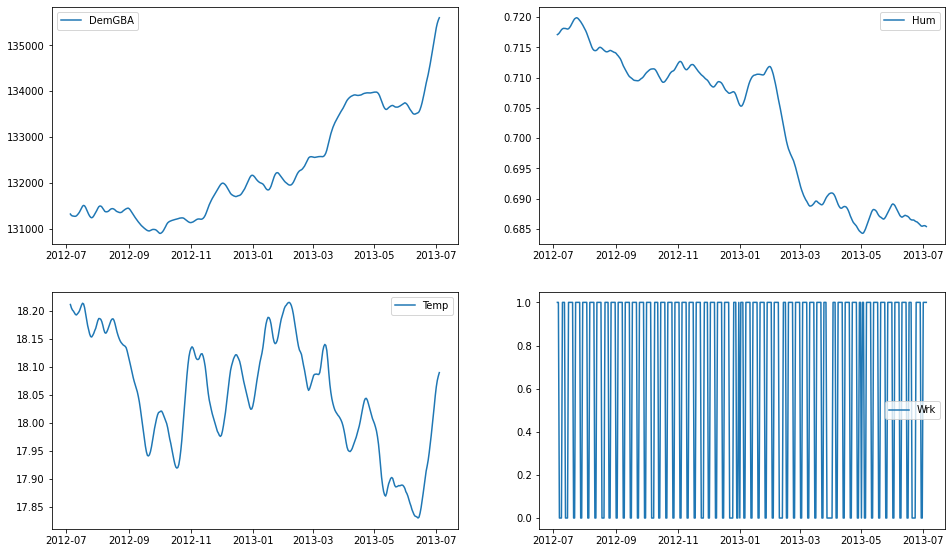

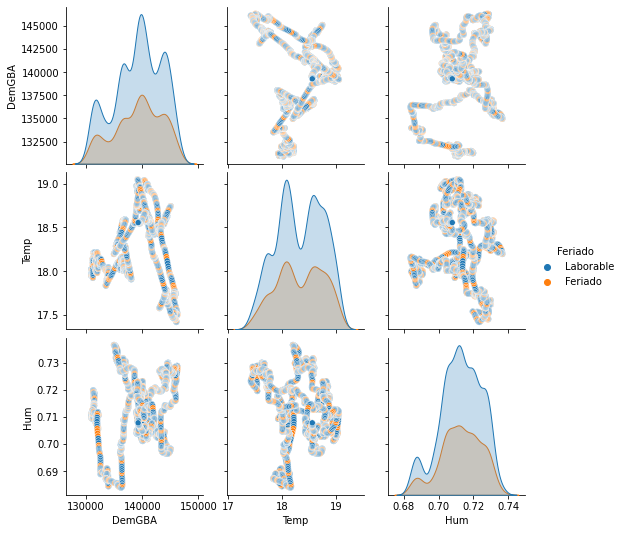

In [ ]:
# %%time
# import statsmodels.api as sm
# from statsmodels.tsa.seasonal import STL
#plot_df(df, lambda x : STL(x).fit().trend) #trend
from statsmodels.tsa.seasonal import seasonal_decompose
import os
# import statsmodels.api as sm
!rm -f df_trend2.csv
if os.path.isfile("df_trend2.csv"):
  df_trend2 = pd.read_csv("df_trend2.csv")
else:
  df_trend2 = df_trend.copy()
  for column in df_trend2.columns:
    if column!='Wrk':
      df_trend2[column] = seasonal_decompose(df_trend2[column], freq=365).trend # seasonal_decompose((df_trend[column]).fit().trend
  # plot_df(df_trend)
  df_trend2 = df_trend2.dropna()
  df_trend2.to_csv("df_trend2.csv",index=False)

plot_df(df_trend2.iloc[:365,:])


df_copy = df_trend2.copy()
df_copy["Feriado"] = "Feriado"
df_copy["Feriado"][df_copy["Wrk"]==1]="Laborable"
fig = sns.pairplot(df_copy[["DemGBA","Temp","Hum","Feriado"]],hue="Feriado")

### Diff DATA COMPUTING (diff1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


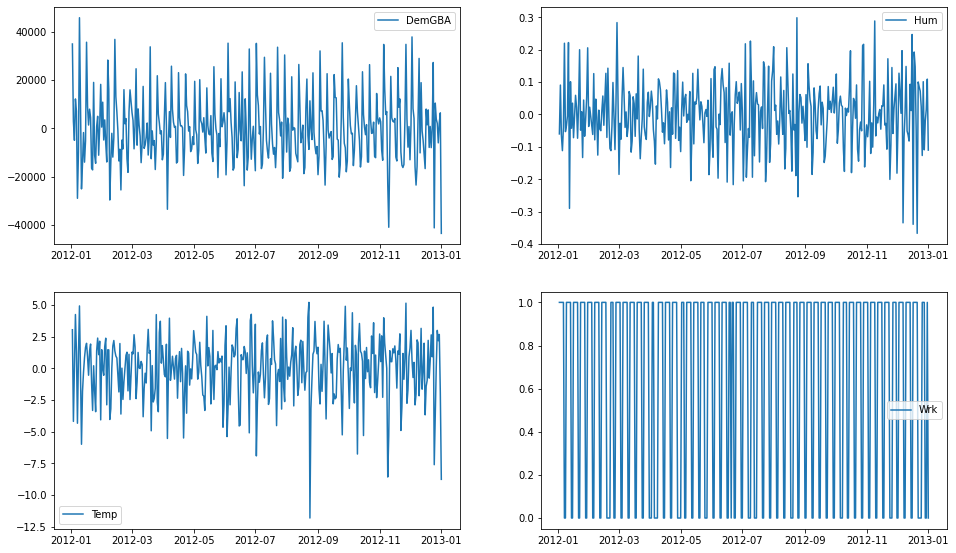

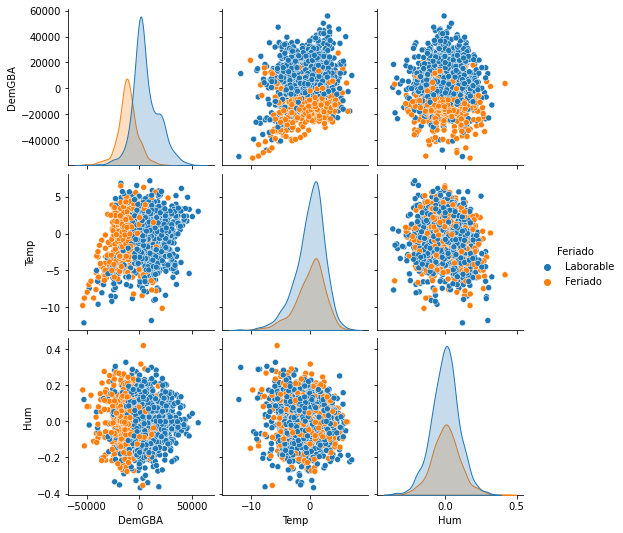

In [ ]:
!rm -f df_diff.csv
import os
import numpy as np

delta=1

if os.path.isfile("df_diff.csv"):
  df_diff = pd.read_csv("df_diff.csv")
else:
  df_diff = pd.DataFrame(np.zeros(shape=(df.shape[0]-delta,df.shape[1])), columns=df.columns, index=df.index[delta:])
  for column in df_diff.columns:
    if column!='Wrk':
      df_diff[column] = df[column][delta:].values-df[column][:-delta].values
    else:
      df_diff[column] = df[column][delta:].values

  # plot_df(df_trend)
  df_diff.to_csv("df_diff.csv",index=False)

plot_df(df_diff.iloc[:365,:])


df_copy = df_diff.copy()
df_copy["Feriado"] = "Feriado"
df_copy["Feriado"][df_copy["Wrk"]==1]="Laborable"
fig = sns.pairplot(df_copy[["DemGBA","Temp","Hum","Feriado"]],hue="Feriado")

### Diff DATA COMPUTING (diff7)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


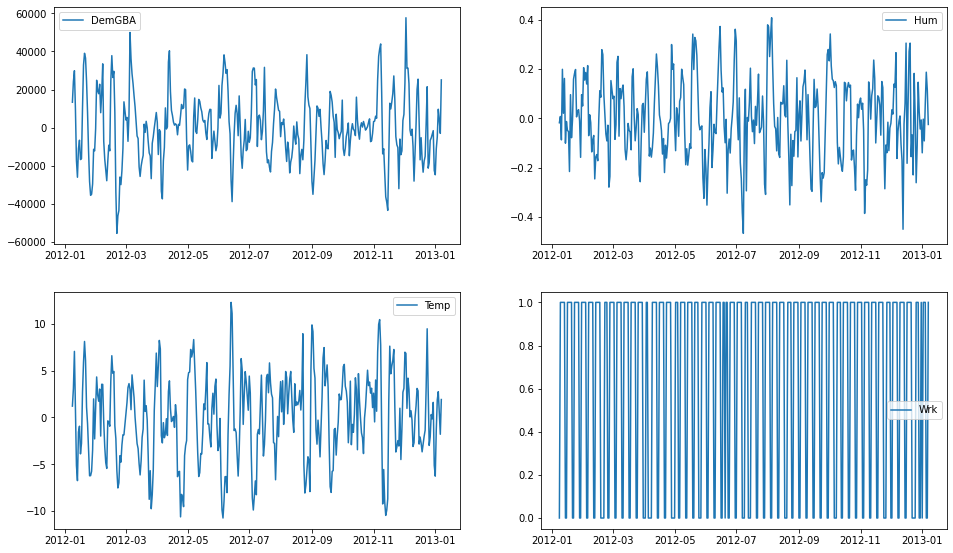

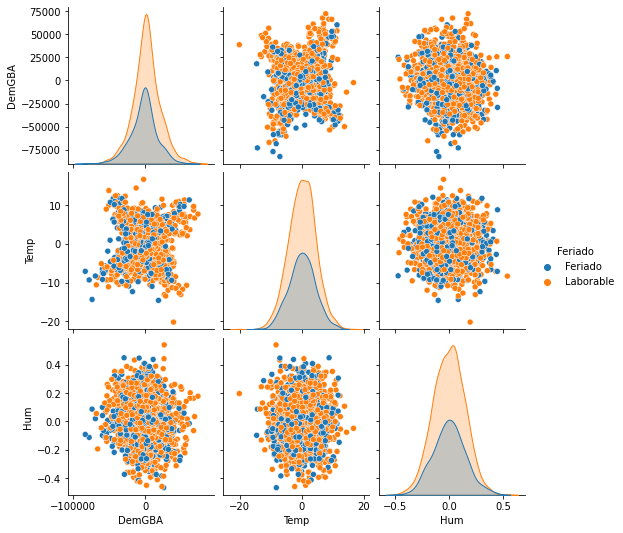

In [ ]:
!rm -f df_diff7.csv
import os
import numpy as np

delta=7

if os.path.isfile("df_diff7.csv"):
  df_diff7 = pd.read_csv("df_diff7.csv")
else:
  df_diff7 = pd.DataFrame(np.zeros(shape=(df.shape[0]-delta,df.shape[1])), columns=df.columns, index=df.index[delta:])
  for column in df_diff7.columns:
    if column!='Wrk':
      df_diff7[column] = df[column][delta:].values-df[column][:-delta].values
    else:
      df_diff7[column] = df[column][delta:].values

  # plot_df(df_trend)
  df_diff7.to_csv("df_diff7.csv",index=False)

plot_df(df_diff7.iloc[:365,:])

df_copy = df_diff7.copy()
df_copy["Feriado"] = "Feriado"
df_copy["Feriado"][df_copy["Wrk"]==1]="Laborable"
fig = sns.pairplot(df_copy[["DemGBA","Temp","Hum","Feriado"]],hue="Feriado")

### Residuos

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


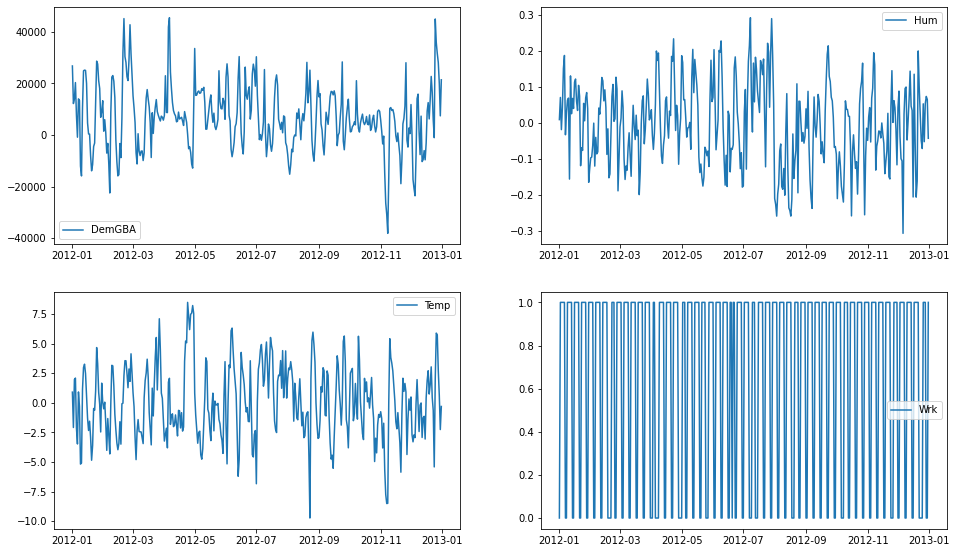

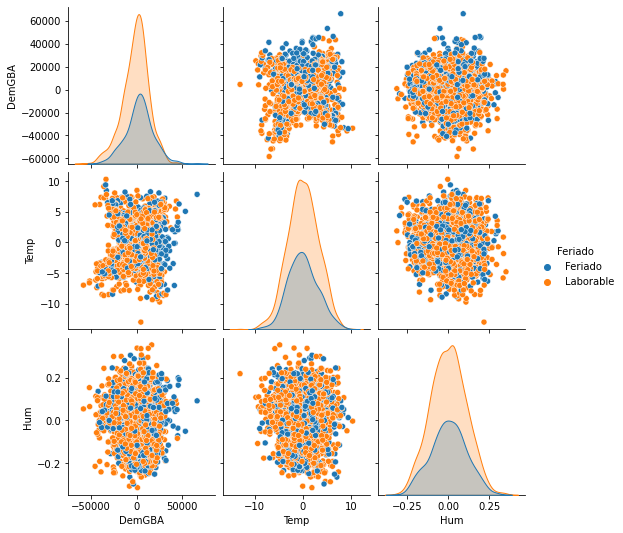

In [ ]:
from sklearn.linear_model import LinearRegression
df_res = df.copy()
vars_ = list(df.columns)
del vars_[vars_.index('Wrk')]
for var_ in vars_:
  y = df[var_]
  X = dummies
  reg = LinearRegression().fit(X, y)
  yhat = reg.predict(X)
  residuos = (yhat-y)
  df_res[var_] = residuos
plot_df(df_res.iloc[:365,:])


df_copy = df_res.copy()
df_copy["Feriado"] = "Feriado"
df_copy["Feriado"][df_copy["Wrk"]==1]="Laborable"
fig = sns.pairplot(df_copy[["DemGBA","Temp","Hum","Feriado"]],hue="Feriado")

## METHODS

In [ ]:
import lingam
import numpy as np
import os
def filter_lags(edges):
  return set([(src.replace('_1',''),dst) for (src,dst) in edges if src.replace('_1','' )!=dst])

def DirectLINGAM(df):
    # adding lagged vars
    df_lag = df.iloc[:-1,:]
    df_nlag = df.iloc[1:,:]
    df = pd.DataFrame(np.hstack([df_nlag, df_lag]), columns=list(df.columns)+[f'{elem}_1' for elem in df.columns])

    # adding prior knowledge to model
    cant_var = df.shape[1]
    priori = np.zeros(shape=(cant_var,cant_var))
    priori[:int(cant_var/2),int(cant_var/2):] = np.ones(shape=(int(cant_var/2),int(cant_var/2)))*-1
    model = lingam.DirectLiNGAM(random_state=1, prior_knowledge=priori)

    # fit and save edges
    arcos = []
    model.fit(df)
    for row_idx, row in enumerate(model.adjacency_matrix_):
        dst = df.columns[row_idx]
        for column_idx, elem in enumerate(row):
            if elem!=0:
                src = df.columns[column_idx]
                arcos.append((src,dst))

    #should not exists edges from future to past Xi:1 -> Xj (beacuse was informed as prior)
    assert len([(src,dst) for (src,dst) in arcos if not '_' in src and '_' in dst  ])==0

    # eliminamos arcos contemporaneos en el pasado(Xj:1->Xi:1) y presente (Xq -> Xp)
    arcos = [(src,dst) for (src,dst) in arcos if not '_' in dst and '_' in src]


    graph = (set(df.columns),set(arcos))
    return graph

from tigramite.pcmci import PCMCI
from tigramite.independence_tests.parcorr import ParCorr
import tigramite.data_processing as pp

def pcmci(df):
    t_df = pp.DataFrame(df.values,var_names=df.columns)
    cond_ind_test = ParCorr()
    pcmci = PCMCI(dataframe=t_df, cond_ind_test=cond_ind_test)
    results = pcmci.run_pcmci(tau_max=1, pc_alpha=None)

    var_count = len(df.columns)
    arcos = []
    m = results['p_matrix']
    for src_idx in range(var_count):
        src = df.columns[src_idx]
        for dst_idx in range(var_count):
            dst = df.columns[dst_idx]
    #                         if m[src_idx,dst_idx,0]<0.05: #src -> dst
    #                             arcos.append((src,dst))
            if m[src_idx,dst_idx,1]<0.05: #src:1 -> dst
                arcos.append((f'{src}_1',dst))

    graph = (set(df.columns),set(arcos))
    return graph


# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic


def var(df, lag=1):
    model = VAR(df)
    model_fitted = model.fit(lag)

    nodes = [elem for elem in model_fitted.pvalues.columns] + [f'{elem}_1' for elem in model_fitted.pvalues.columns]
    arcos = []
    for row in range(1,len(model_fitted.pvalues)):
        src = model_fitted.pvalues.index[row]
        for column in range(len(model_fitted.pvalues.columns)):
            dst = model_fitted.pvalues.columns[column]
            if model_fitted.pvalues.iloc[row,column] < 0.05:
                arcos.append((src,dst))
    arcos = [(f"{src.replace('L1.','')}_1" ,dst) for src,dst in arcos]

    graph = (set(nodes), set(arcos))
    return graph
from tigramite.pcmci import PCMCI
from tigramite.independence_tests.parcorr import ParCorr
import tigramite.data_processing as pp

def pc(df):
        t_df = pp.DataFrame(df.values,var_names=df.columns)
        cond_ind_test = ParCorr()
        pcmci = PCMCI(dataframe=t_df, cond_ind_test=cond_ind_test)
        all_parents = pcmci.run_pc_stable(tau_max=1, pc_alpha=None)

        var_count = len(df.columns)
        arcos = []

        for dst_idx in range(var_count):
            dst = df.columns[dst_idx]
            for parent in all_parents[dst_idx]:
                src_idx,lag = parent
                assert lag==-1
                src = df.columns[src_idx]
                arcos.append((f'{src}_1',dst))
#                     for dst_idx in range(var_count):
#                         dst = df.columns[dst_idx]
# #                         if m[src_idx,dst_idx,0]<0.05: #src -> dst
# #                             arcos.append((src,dst))
#                         if m[src_idx,dst_idx,1]<0.05: #src:1 -> dst


        graph = (set(df.columns),set(arcos))
        return graph

/usr/local/lib/python3.7/dist-packages/tigramite/independence_tests/gpdc.py:16: UserWarning: No module named 'dcor'
  warnings.warn(str(e))
/usr/local/lib/python3.7/dist-packages/tigramite/independence_tests/gpdc_torch.py:18: UserWarning: No module named 'dcor'
  warnings.warn(str(e))


## RUN methods

### RUN FULL

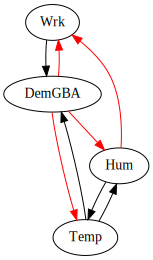

                          pc - full


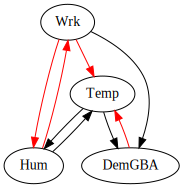

                          pcmci - full


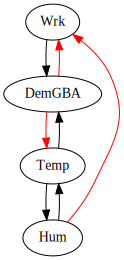

                          DirectLINGAM - full


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


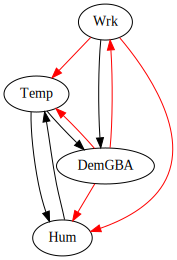

                          var - full


In [ ]:
from graphviz import Digraph

import re

set_of_valid_vertices = {
    'DemGBA',
    'Temp',
    'Hum',
    'Wrk'
}
def filter_graph(graph, set_of_valid_vertices):
  vertices,edges = graph
  new_vertices = vertices.intersection(set_of_valid_vertices)
  new_edges = [(src,dst) for src,dst in edges if src.replace('_1','') in set_of_valid_vertices and dst in set_of_valid_vertices]
  return new_vertices,new_edges

set_of_wrong_edges = set([
    ('DemGBA_1','Temp'),
    ('DemGBA_1','Wrk'),
    ('DemGBA_1','Hum'),
    ('Wrk_1', 'Hum'),
    ('Wrk_1', 'Temp'),
    ('Temp_1', 'Wrk'),
    ('Hum_1', 'Wrk')
])
#############
## CONTEMP ##
#############
set_of_wrong_edges = filter_lags(set_of_wrong_edges)

for method in [pc,pcmci,DirectLINGAM,var]:
  dot = Digraph(f'{method.__name__}_full' ,filename=f'{method.__name__}_full.gv',format='pdf',graph_attr={'crop':'True'})
  graph = method(df)
  nodes,edges = filter_graph(graph,set_of_valid_vertices=set_of_valid_vertices)
  #############
  ## CONTEMP ##
  #############
  edges = filter_lags(edges)


  for idx,node in enumerate(nodes):
    dot.node(node)
  for src,dst in edges:
    if re.sub('_1','',src)==dst:
      dot.edge(src,dst, color='gray') #style='dashed')
    elif (src,dst) not in set_of_wrong_edges:
      dot.edge(src,dst, color="black")
    else:
      dot.edge(src,dst, color="red")

  dot.render()
  # print(str(dot))


  display(dot)
  print('                          ' +method.__name__ + ' - full')


### RUN DIFF(1)

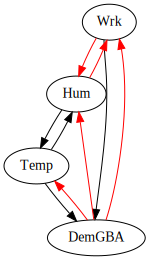

                          pc - diff7


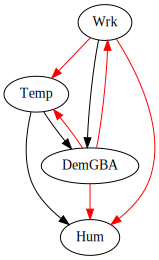

                          pcmci - diff7


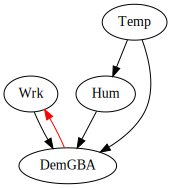

                          DirectLINGAM - diff7


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


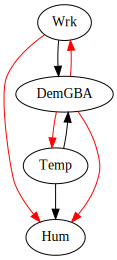

                          var - diff7


In [ ]:
import re

#############
## CONTEMP ##
#############
set_of_wrong_edges = filter_lags(set_of_wrong_edges)

for method in [pc,pcmci,DirectLINGAM,var]:
  graph = method(df_diff)
  nodes,edges = filter_graph(graph,set_of_valid_vertices=set_of_valid_vertices)
  #############
  ## CONTEMP ##
  #############
  edges = filter_lags(edges)
  # print(method.__name__)
  dot = Digraph()

  for node in nodes:
    dot.node(node)

  for src,dst in edges:
    if re.sub('_1','',src)==dst:
      dot.edge(src,dst, color='gray') #style='dashed')
    elif (src,dst) not in set_of_wrong_edges:
      dot.edge(src,dst, color="black")
    else:
      dot.edge(src,dst, color="red")

  dot.render(f'{method.__name__}_diff1.gv', view=True)
  display(dot)
  print('                          ' +method.__name__ + ' - diff7')



### RUN DIFF(7)

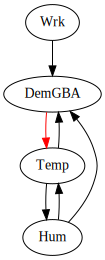

                          pc - diff7


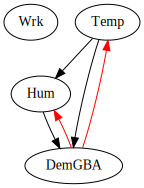

                          pcmci - diff7


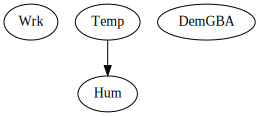

                          DirectLINGAM - diff7


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


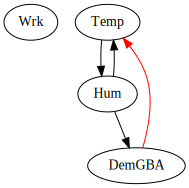

                          var - diff7


In [ ]:
import re
#############
## CONTEMP ##
#############
set_of_wrong_edges = filter_lags(set_of_wrong_edges)


for method in [pc,pcmci,DirectLINGAM,var]:
  graph = method(df_diff7)
  nodes,edges = filter_graph(graph,set_of_valid_vertices=set_of_valid_vertices)

  #############
  ## CONTEMP ##
  #############
  edges = filter_lags(edges)

  # print(method.__name__)
  dot = Digraph()
  for node in nodes:
    dot.node(node)
  for src,dst in edges:
    if re.sub('_1','',src)==dst:
      dot.edge(src,dst, color='gray') #style='dashed')
    elif (src,dst) not in set_of_wrong_edges:
      dot.edge(src,dst, color="black")
    else:
      dot.edge(src,dst, color="red")

  dot.render(f'{method.__name__}_diff7.gv', view=True)
  display(dot)
  print('                          ' +method.__name__ + ' - diff7')



### RUN TREND

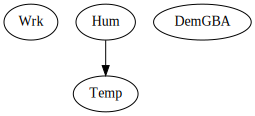

                          pc - trend


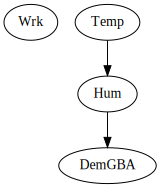

                          pcmci - trend


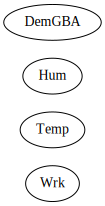

                          DirectLINGAM - trend


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


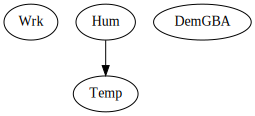

                          var - trend


In [ ]:
import re
#############
## CONTEMP ##
#############
set_of_wrong_edges = filter_lags(set_of_wrong_edges)

for method in [pc,pcmci,DirectLINGAM,var]:
  graph = method(df_trend)
  nodes,edges = filter_graph(graph,set_of_valid_vertices=set_of_valid_vertices)
  #############
  ## CONTEMP ##
  #############
  edges = filter_lags(edges)

  # print(method.__name__)
  if not method.__name__=='DirectLINGAM':
    dot = Digraph()
  else:
    dot = Digraph(engine='neato')
  for idx,node in enumerate(nodes):
    dot.node(node,pos=f'1,{idx*.75+1}!')

  for src,dst in edges:
    if re.sub('_1','',src)==dst:
      dot.edge(src,dst, color='gray') #style='dashed')
    elif (src,dst) not in set_of_wrong_edges:
      dot.edge(src,dst, color="black")
    else:
      dot.edge(src,dst, color="red")

  dot.render(f'{method.__name__}_trend1.gv', view=True)
  display(dot)
  print('                          ' +method.__name__ + ' - trend')



### RUN TREND(2)

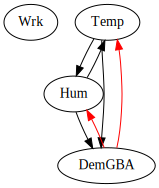

                          pc - trend(2)


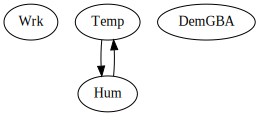

                          pcmci - trend(2)


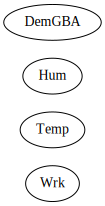

                          DirectLINGAM - trend(2)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


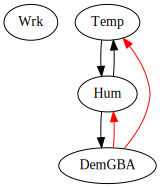

                          var - trend(2)


In [ ]:
import re

#############
## CONTEMP ##
#############
set_of_wrong_edges = filter_lags(set_of_wrong_edges)

for method in [pc,pcmci,DirectLINGAM,var]:
  graph = method(df_trend2)
  nodes,edges = filter_graph(graph,set_of_valid_vertices=set_of_valid_vertices)
  #############
  ## CONTEMP ##
  #############
  edges = filter_lags(edges)

  # print(method.__name__)
  if not method.__name__=='DirectLINGAM':
    dot = Digraph()
  else:
    dot = Digraph(engine='neato')

  for idx,node in enumerate(nodes):
    dot.node(node,pos=f'1,{idx*.75+1}!')
  for src,dst in edges:
    if re.sub('_1','',src)==dst:
      dot.edge(src,dst, color='gray') #style='dashed')
    elif (src,dst) not in set_of_wrong_edges:
      dot.edge(src,dst, color="black")
    else:
      dot.edge(src,dst, color="red")

  dot.render(f'{method.__name__}_trend2.gv', view=True)
  display(dot)
  print('                          ' +method.__name__ + ' - trend(2)')



### RUN RESIDUOS

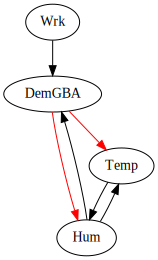

                          pc - residuos


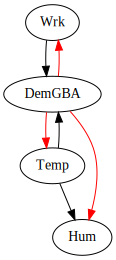

                          pcmci - residuos


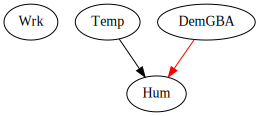

                          DirectLINGAM - residuos


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


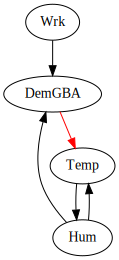

                          var - residuos


In [ ]:
import re

#############
## CONTEMP ##
#############
set_of_wrong_edges = filter_lags(set_of_wrong_edges)

for method in [pc,pcmci,DirectLINGAM,var]:
  graph = method(df_res)
  nodes,edges = filter_graph(graph,set_of_valid_vertices=set_of_valid_vertices)
  #############
  ## CONTEMP ##
  #############
  edges = filter_lags(edges)

  # print(method.__name__)
  dot = Digraph()
  for node in nodes:
    dot.node(node)
  for src,dst in edges:
    if re.sub('_1','',src)==dst:
      dot.edge(src,dst, color='gray') #style='dashed')
    elif (src,dst) not in set_of_wrong_edges:
      dot.edge(src,dst, color="black")
    else:
      dot.edge(src,dst, color="red")

  dot.render(f'{method.__name__}_res.gv', view=True)
  display(dot)
  print('                          ' +method.__name__ + ' - residuos')



In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!cp -v *pdf /content/gdrive/MyDrive/tmp_results_from_colab/CAMMESA/

'CAMMESA_groundtruth_corrects_desenrollado.pdf' -> '/content/gdrive/MyDrive/tmp_results_from_colab/CAMMESA/CAMMESA_groundtruth_corrects_desenrollado.pdf'
'CAMMESA_groundtruth_corrects.pdf' -> '/content/gdrive/MyDrive/tmp_results_from_colab/CAMMESA/CAMMESA_groundtruth_corrects.pdf'
'CAMMESA_groundtruth_incorrects_desenrollado.pdf' -> '/content/gdrive/MyDrive/tmp_results_from_colab/CAMMESA/CAMMESA_groundtruth_incorrects_desenrollado.pdf'
'CAMMESA_groundtruth_incorrects.pdf' -> '/content/gdrive/MyDrive/tmp_results_from_colab/CAMMESA/CAMMESA_groundtruth_incorrects.pdf'
'corrects.pdf' -> '/content/gdrive/MyDrive/tmp_results_from_colab/CAMMESA/corrects.pdf'


## RUN TABLE EDGES

In [ ]:
arcos_de_interes = [
                    ('Hum_1', 'Temp'),
                    ('Hum_1', 'DemGBA'),
                    ('Temp_1', 'Hum'),
                    ('Temp_1', 'DemGBA'),
                    ('Wrk_1', 'DemGBA'),
]


In [ ]:
str_ = ''

for method in [pcmci,pc,DirectLINGAM, var]:

  for arco in arcos_de_interes:
    for data in  [df, df_trend, df_trend2, df_diff, df_diff7, df_res]:

      if arco in method(data)[1]:
        str_ = str_+ '☑,'
      else:
        str_ = str_+ '☒,'
  str_=str_+'\n'

print(str_)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

☑,☒,☑,☒,☒,☒,☒,☑,☒,☒,☑,☒,☑,☑,☑,☑,☑,☑,☑,☒,☒,☑,☑,☑,☑,☒,☒,☑,☒,☑,
☑,☑,☑,☑,☑,☑,☒,☒,☑,☒,☑,☑,☑,☒,☑,☑,☑,☑,☑,☒,☑,☑,☑,☒,☑,☒,☒,☑,☑,☑,
☑,☒,☒,☒,☒,☒,☒,☒,☒,☑,☒,☒,☑,☒,☒,☑,☑,☑,☑,☒,☒,☑,☒,☒,☑,☒,☒,☑,☒,☒,
☑,☑,☑,☒,☑,☑,☒,☒,☑,☒,☑,☑,☑,☒,☑,☑,☑,☑,☑,☒,☒,☑,☒,☒,☑,☒,☒,☑,☒,☑,



/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

## RUN F1

In [ ]:
set_of_wrong_edges = set([
    ('DemGBA_1','Temp'),
    ('DemGBA_1','Wrk'),
    ('DemGBA_1','Hum'),
    ('Wrk_1', 'Hum'),
    ('Wrk_1', 'Temp'),
    ('Temp_1', 'Wrk'),
    ('Hum_1', 'Wrk')
])

set_of_correct_edges = set([
    ('DemGBA_1','DemGBA'),
    ('Temp_1','Temp'),
    ('Hum_1','Hum'),
    ('Wrk_1','Wrk'),


    # ('DemGBA_1','Temp'),
    # ('DemGBA_1','Hum'),
    # ('DemGBA_1','Wrk'),


    ('Temp_1','DemGBA'),
    ('Temp_1','Hum'),
    # ('Temp_1','Wrk'),


    ('Hum_1','DemGBA'),
    ('Hum_1','Temp'),
    # ('Hum_1','Wrk'),


    ('Wrk_1','DemGBA'),
    # ('Wrk_1','Temp'),
    # ('Wrk_1','Hum'),

])

set_of_wrong_edges = filter_lags(set_of_wrong_edges)
set_of_correct_edges = filter_lags(set_of_correct_edges)
set_of_correct_edges
full_set_of_edges = set_of_correct_edges.union(set_of_wrong_edges)


In [ ]:
set_of_wrong_edges

{('DemGBA', 'Hum'),
 ('DemGBA', 'Temp'),
 ('DemGBA', 'Wrk'),
 ('Hum', 'Wrk'),
 ('Temp', 'Wrk'),
 ('Wrk', 'Hum'),
 ('Wrk', 'Temp')}

In [ ]:
# str_=''
results = []
set_of_valid_vertices = {
    'DemGBA',
    'Temp',
    'Hum',
    'Wrk'
}
def filter_graph(graph, set_of_valid_vertices):
  vertices,edges = graph
  new_vertices = vertices.intersection(set_of_valid_vertices)
  new_edges = [(src,dst) for src,dst in edges if src.replace('_1','') in set_of_valid_vertices and dst in set_of_valid_vertices]
  return new_vertices,new_edges

db_names = ['full', 'trend1', 'trend2', 'diff(1)', 'diff(7)', 'residuos']



for method in [pcmci,pc,DirectLINGAM, var]:
  for idx,data in  enumerate([df, df_trend, df_trend2, df_diff, df_diff7, df_res]):
    graph = method(data)
    _,edges = filter_graph(graph,set_of_valid_vertices=set_of_valid_vertices)
    edges = filter_lags(edges)

    print( f'GROUND-TRUTH: {set_of_correct_edges}')
    print( f'ENCONTRADOS : {edges}')
    # print(edges)
    edges=set(edges)
    # edges = method()[1]

    recall = len(edges.intersection(set_of_correct_edges))/len(set_of_correct_edges)
    if (len(edges)==0):
      precision=0
    else:
      precision = len(edges.intersection(set_of_correct_edges))/len(edges)
    if precision+recall==0:
      f1=0
    else:
      f1 = 2*((precision*recall)/(precision+recall))

    sens = recall
    not_selected = full_set_of_edges.difference(edges)
    spec = (len(not_selected.intersection(set_of_wrong_edges))/len(set_of_wrong_edges))
    if sens+spec==0:
      h1=0
    else:
      h1 = 2*((sens*spec)/(sens+spec))
    # red = len([(src,dst) for src,dst in edges if (src,dst) in set_of_wrong_edges])
    # gray = len([(src,dst) for src,dst in edges if re.sub('_1','',src)==dst] )
    # black = len([(src,dst) for src,dst in edges if not (src,dst) in set_of_wrong_edges]) - gray

    # pblack = (black/(black+gray))
    # pred = (red/(black+gray))
    # f1 = 2*((pblack*pred)/(pblack+pred)) if (pblack+pred)!=0 else 0
    results.append([db_names[idx], method.__name__, 'precision',precision])
    results.append([db_names[idx], method.__name__, 'recall', recall])
    results.append([db_names[idx], method.__name__, 'f1score', f1])


    results.append([db_names[idx], method.__name__, 'sensitivity',sens])
    results.append([db_names[idx], method.__name__, 'specificity', spec])
    results.append([db_names[idx], method.__name__, 'h1score', h1])
    # df.app
    # str_= str_+f'{pblack:4.3f},{pred:4.3f},{f1:4.3f},'
  # str_=str_+'\n'

results = pd.DataFrame(results, columns=['db', 'method','metric','value'])
results

GROUND-TRUTH: {('Hum', 'Temp'), ('Temp', 'Hum'), ('Temp', 'DemGBA'), ('Hum', 'DemGBA'), ('Wrk', 'DemGBA')}
ENCONTRADOS : {('Temp', 'Hum'), ('Temp', 'DemGBA'), ('DemGBA', 'Temp'), ('Hum', 'Wrk'), ('Wrk', 'DemGBA')}
GROUND-TRUTH: {('Hum', 'Temp'), ('Temp', 'Hum'), ('Temp', 'DemGBA'), ('Hum', 'DemGBA'), ('Wrk', 'DemGBA')}
ENCONTRADOS : {('Temp', 'Hum'), ('Hum', 'Temp'), ('Hum', 'DemGBA')}
GROUND-TRUTH: {('Hum', 'Temp'), ('Temp', 'Hum'), ('Temp', 'DemGBA'), ('Hum', 'DemGBA'), ('Wrk', 'DemGBA')}
ENCONTRADOS : {('Hum', 'Temp'), ('DemGBA', 'Temp')}
GROUND-TRUTH: {('Hum', 'Temp'), ('Temp', 'Hum'), ('Temp', 'DemGBA'), ('Hum', 'DemGBA'), ('Wrk', 'DemGBA')}
ENCONTRADOS : {('Hum', 'Temp'), ('Temp', 'Hum'), ('DemGBA', 'Temp'), ('DemGBA', 'Hum'), ('Wrk', 'DemGBA'), ('Wrk', 'Temp'), ('Wrk', 'Hum'), ('DemGBA', 'Wrk')}
GROUND-TRUTH: {('Hum', 'Temp'), ('Temp', 'Hum'), ('Temp', 'DemGBA'), ('Hum', 'DemGBA'), ('Wrk', 'DemGBA')}
ENCONTRADOS : {('Temp', 'Hum'), ('Hum', 'Temp'), ('DemGBA', 'Temp'), ('Hum', 'D

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


GROUND-TRUTH: {('Hum', 'Temp'), ('Temp', 'Hum'), ('Temp', 'DemGBA'), ('Hum', 'DemGBA'), ('Wrk', 'DemGBA')}
ENCONTRADOS : {('Temp', 'Hum'), ('Hum', 'Temp'), ('DemGBA', 'Temp'), ('Hum', 'DemGBA'), ('DemGBA', 'Hum'), ('Temp', 'DemGBA')}
GROUND-TRUTH: {('Hum', 'Temp'), ('Temp', 'Hum'), ('Temp', 'DemGBA'), ('Hum', 'DemGBA'), ('Wrk', 'DemGBA')}
ENCONTRADOS : {('Hum', 'Temp'), ('Temp', 'Hum'), ('DemGBA', 'Hum'), ('DemGBA', 'Temp'), ('DemGBA', 'Wrk'), ('Temp', 'Wrk'), ('Wrk', 'Hum'), ('Wrk', 'DemGBA')}
GROUND-TRUTH: {('Hum', 'Temp'), ('Temp', 'Hum'), ('Temp', 'DemGBA'), ('Hum', 'DemGBA'), ('Wrk', 'DemGBA')}
ENCONTRADOS : {('Hum', 'Temp'), ('Temp', 'DemGBA')}


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


GROUND-TRUTH: {('Hum', 'Temp'), ('Temp', 'Hum'), ('Temp', 'DemGBA'), ('Hum', 'DemGBA'), ('Wrk', 'DemGBA')}
ENCONTRADOS : {('Hum', 'Temp'), ('Temp', 'Hum'), ('Wrk', 'DemGBA'), ('Temp', 'DemGBA')}


,db,method,metric,value
0,full,pcmci,precision,0.600000
1,full,pcmci,recall,0.600000
2,full,pcmci,f1score,0.600000
3,full,pcmci,sensitivity,0.600000
4,full,pcmci,specificity,0.714286
...,...,...,...,...
139,residuos,var,recall,0.800000
140,residuos,var,f1score,0.888889
141,residuos,var,sensitivity,0.800000
142,residuos,var,specificity,1.000000


In [ ]:
results[results["metric"]=="h1score"].to_csv("results.csv")
!cat results.csv

,db,method,metric,value
5,full,pcmci,h1score,0.6521739130434783
11,trend1,pcmci,h1score,0.7499999999999999
17,trend2,pcmci,h1score,0.32432432432432434
23,diff(1),pcmci,h1score,0.3870967741935483
29,diff(7),pcmci,h1score,0.6521739130434783
35,residuos,pcmci,h1score,0.5853658536585366
41,full,pc,h1score,0.7547169811320756
47,trend1,pc,h1score,0.32432432432432434
53,trend2,pc,h1score,0.5128205128205129
59,diff(1),pc,h1score,0.3333333333333333
65,diff(7),pc,h1score,0.7058823529411764
71,residuos,pc,h1score,0.7058823529411764
77,full,DirectLINGAM,h1score,0.4137931034482759
83,trend1,DirectLINGAM,h1score,0.0
89,trend2,DirectLINGAM,h1score,0.0
95,diff(1),DirectLINGAM,h1score,0.3870967741935483
101,diff(7),DirectLINGAM,h1score,0.7547169811320756
107,residuos,DirectLINGAM,h1score,0.5454545454545455
113,full,var,h1score,0.7272727272727273
119,trend1,var,h1score,0.7499999999999999
125,trend2,var,h1score,0.7547169811320756
131,diff(1),var,h1score,0.3870967741935483
137,diff(7),var,h1score,0.571428


## PLOT GROUND TRUTH

In [ ]:
def filter_lags(edges):
  return set([(src.replace('_1',''),dst) for (src,dst) in edges if src.replace('_1','' )!=dst])
set_of_wrong_edges = set([
    ('DemGBA_1','Temp'),
    ('DemGBA_1','Wrk'),
    ('DemGBA_1','Hum'),
    ('Wrk_1', 'Hum'),
    ('Wrk_1', 'Temp'),
    ('Temp_1', 'Wrk'),
    ('Hum_1', 'Wrk')
])

set_of_correct_edges = set([
    ('DemGBA_1','DemGBA'),
    ('Temp_1','Temp'),
    ('Hum_1','Hum'),
    ('Wrk_1','Wrk'),


    # ('DemGBA_1','Temp'),
    # ('DemGBA_1','Hum'),
    # ('DemGBA_1','Wrk'),


    ('Temp_1','DemGBA'),
    ('Temp_1','Hum'),
    # ('Temp_1','Wrk'),


    ('Hum_1','DemGBA'),
    ('Hum_1','Temp'),
    # ('Hum_1','Wrk'),


    ('Wrk_1','DemGBA'),
    # ('Wrk_1','Temp'),
    # ('Wrk_1','Hum'),

])

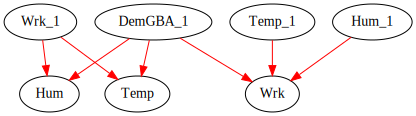

'CAMMESA_groundtruth_incorrects_desenrollado.pdf'

In [ ]:
from graphviz import Digraph
dot = Digraph()
# for src,dst in filter_lags(set_of_wrong_edges):
for src,dst in (set_of_wrong_edges):
  dot.edge(src,dst, color="red")
display(dot)
dot.render(filename='CAMMESA_groundtruth_incorrects',format='pdf')
dot.render(filename='CAMMESA_groundtruth_incorrects_desenrollado',format='pdf')

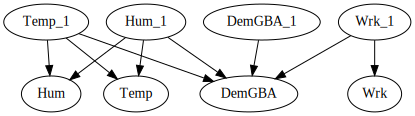

'CAMMESA_groundtruth_corrects_desenrollado.pdf'

In [ ]:
from graphviz import Digraph
dot = Digraph()
# for src,dst in filter_lags(set_of_correct_edges):
for src,dst in (set_of_correct_edges):
  dot.edge(src,dst, color="black")
display(dot)
# dot.render(filename='CAMMESA_groundtruth_corrects',format='pdf')
dot.render(filename='CAMMESA_groundtruth_corrects_desenrollado',format='pdf')

# MISC (BORRAR)

##

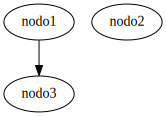

In [ ]:

from graphviz import Digraph

def plot_graph(graph):
    nodes, edges = graph
    # Create Digraph object
    dot = Digraph()
    for node in nodes:
        dot.node(node)
    dot.edges(edges)
    return dot
plot_graph(({'nodo1','nodo2','nodo2'}, {('nodo1','nodo3')}))

## FULL


### DirectLiNGAM

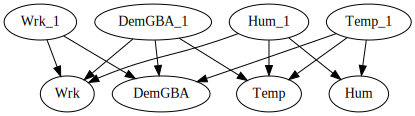

In [ ]:
import lingam
import numpy as np
import os

def DirectLINGAM(df):
    # adding lagged vars
    df_lag = df.iloc[:-1,:]
    df_nlag = df.iloc[1:,:]
    df = pd.DataFrame(np.hstack([df_nlag, df_lag]), columns=list(df.columns)+[f'{elem}_1' for elem in df.columns])

    # adding prior knowledge to model
    cant_var = df.shape[1]
    priori = np.zeros(shape=(cant_var,cant_var))
    priori[:int(cant_var/2),int(cant_var/2):] = np.ones(shape=(int(cant_var/2),int(cant_var/2)))*-1
    model = lingam.DirectLiNGAM(random_state=1, prior_knowledge=priori)

    # fit and save edges
    arcos = []
    model.fit(df)
    for row_idx, row in enumerate(model.adjacency_matrix_):
        dst = df.columns[row_idx]
        for column_idx, elem in enumerate(row):
            if elem!=0:
                src = df.columns[column_idx]
                arcos.append((src,dst))

    #should not exists edges from future to past Xi:1 -> Xj (beacuse was informed as prior)
    assert len([(src,dst) for (src,dst) in arcos if not '_' in src and '_' in dst  ])==0

    # eliminamos arcos contemporaneos en el pasado(Xj:1->Xi:1) y presente (Xq -> Xp)
    arcos = [(src,dst) for (src,dst) in arcos if not '_' in dst and '_' in src]


    graph = (set(df.columns),set(arcos))
    return graph
# df_cycle = df.copy()
# for column in df_cycle.columns:
#     df_cycle[column] = sm.tsa.filters.hpfilter(df_cycle[column], 129600)[0]

dot = plot_graph(DirectLINGAM(df))
dot.format = 'pdf'
dot.view(filename='DLINGAM_hourly', directory='./')
assert os.path.exists('DLINGAM_hourly.pdf')
display(dot)

### PCMCI

/usr/local/lib/python3.7/dist-packages/tigramite/independence_tests/gpdc.py:16: UserWarning: No module named 'dcor'
  warnings.warn(str(e))
/usr/local/lib/python3.7/dist-packages/tigramite/independence_tests/gpdc_torch.py:18: UserWarning: No module named 'dcor'
  warnings.warn(str(e))


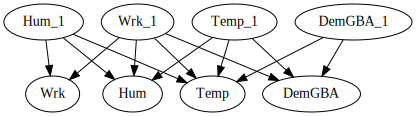

In [ ]:
from tigramite.pcmci import PCMCI
from tigramite.independence_tests.parcorr import ParCorr
import tigramite.data_processing as pp

def pcmci(df):
    t_df = pp.DataFrame(df.values,var_names=df.columns)
    cond_ind_test = ParCorr()
    pcmci = PCMCI(dataframe=t_df, cond_ind_test=cond_ind_test)
    results = pcmci.run_pcmci(tau_max=1, pc_alpha=None)

    var_count = len(df.columns)
    arcos = []
    m = results['p_matrix']
    for src_idx in range(var_count):
        src = df.columns[src_idx]
        for dst_idx in range(var_count):
            dst = df.columns[dst_idx]
    #                         if m[src_idx,dst_idx,0]<0.05: #src -> dst
    #                             arcos.append((src,dst))
            if m[src_idx,dst_idx,1]<0.05: #src:1 -> dst
                arcos.append((f'{src}_1',dst))

    graph = (set(df.columns),set(arcos))
    return graph

# Save as svg file
dot = plot_graph(pcmci(df))
dot.format = 'pdf'
dot.view(filename='PCMCI_hourly', directory='./')
assert os.path.exists('PCMCI_hourly.pdf')
display(dot)

### VAR

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


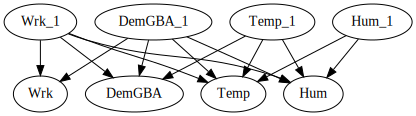

In [ ]:
# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic


def var(df, lag=1):
    model = VAR(df)
    model_fitted = model.fit(lag)

    nodes = [elem for elem in model_fitted.pvalues.columns] + [f'{elem}_1' for elem in model_fitted.pvalues.columns]
    arcos = []
    for row in range(1,len(model_fitted.pvalues)):
        src = model_fitted.pvalues.index[row]
        for column in range(len(model_fitted.pvalues.columns)):
            dst = model_fitted.pvalues.columns[column]
            if model_fitted.pvalues.iloc[row,column] < 0.05:
                arcos.append((src,dst))
    arcos = [(f"{src.replace('L1.','')}_1" ,dst) for src,dst in arcos]

    graph = (set(nodes), set(arcos))
    return graph

dot = plot_graph(var(df))
dot.format = 'pdf'
dot.view(filename='VAR_hourly', directory='./')
assert os.path.exists('VAR_hourly.pdf')
display(dot)

###PC

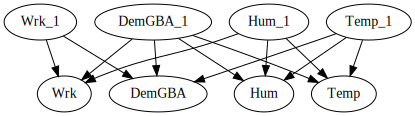

In [ ]:
from tigramite.pcmci import PCMCI
from tigramite.independence_tests.parcorr import ParCorr
import tigramite.data_processing as pp

def pc(df):
        t_df = pp.DataFrame(df.values,var_names=df.columns)
        cond_ind_test = ParCorr()
        pcmci = PCMCI(dataframe=t_df, cond_ind_test=cond_ind_test)
        all_parents = pcmci.run_pc_stable(tau_max=1, pc_alpha=None)

        var_count = len(df.columns)
        arcos = []

        for dst_idx in range(var_count):
            dst = df.columns[dst_idx]
            for parent in all_parents[dst_idx]:
                src_idx,lag = parent
                assert lag==-1
                src = df.columns[src_idx]
                arcos.append((f'{src}_1',dst))
#                     for dst_idx in range(var_count):
#                         dst = df.columns[dst_idx]
# #                         if m[src_idx,dst_idx,0]<0.05: #src -> dst
# #                             arcos.append((src,dst))
#                         if m[src_idx,dst_idx,1]<0.05: #src:1 -> dst


        graph = (set(df.columns),set(arcos))
        return graph

dot = plot_graph(pc(df))
dot.format = 'pdf'
dot.view(filename='PC_hourly', directory='./')
assert os.path.exists('PC_hourly.pdf')
display(dot)

In [ ]:
set_of_wrong_edges = set([
    ('DemGBA_1','Temp'),
    ('DemGBA_1','Wrk'),
    ('DemGBA_1','Hum'),
    ('Wrk_1', 'Hum'),
    ('Wrk_1', 'Temp'),
    ('Temp_1', 'Wrk'),
    ('Hum_1', 'Wrk')
])
set_of_wrong_edges

{('DemGBA_1', 'Hum'),
 ('DemGBA_1', 'Temp'),
 ('DemGBA_1', 'Wrk'),
 ('Hum_1', 'Wrk'),
 ('Temp_1', 'Wrk'),
 ('Wrk_1', 'Hum'),
 ('Wrk_1', 'Temp')}


### FULL

pc


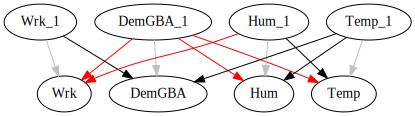

pcmci


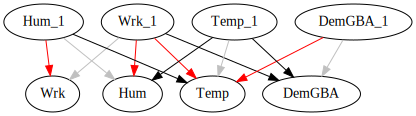

DirectLINGAM


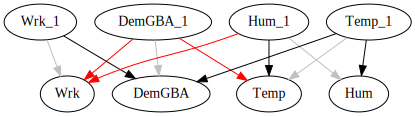

var


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


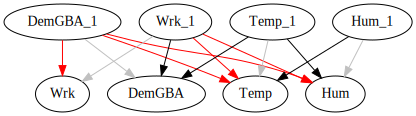

In [ ]:
import re

for method in [pc,pcmci,DirectLINGAM,var]:
  print(method.__name__)
  dot = Digraph()
  for src,dst in method(df)[1]:
    if re.sub('_1','',src)==dst:
      dot.edge(src,dst, color='gray') #style='dashed')
    elif (src,dst) not in set_of_wrong_edges:
      dot.edge(src,dst, color="black")
    else:
      dot.edge(src,dst, color="red")

  display(dot)


## DIFF

pc


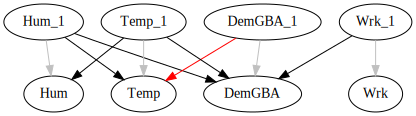

pcmci


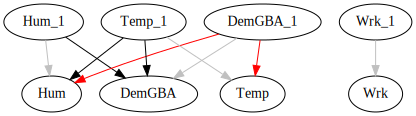

DirectLINGAM


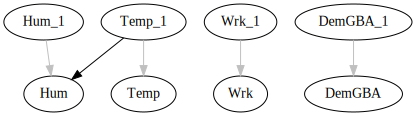

AttributeError: ignored

In [ ]:
import re

for method in [pc,pcmci,DirectLINGAM,var]:
  print(method.__name__)
  dot = Digraph()
  for src,dst in method(df_diff)[1]:
    if re.sub('_1','',src)==dst:
      dot.edge(src,dst, color='gray') #style='dashed')
    elif (src,dst) not in set_of_wrong_edges:
      dot.edge(src,dst, color="black")
    else:
      dot.edge(src,dst, color="red")

  display(dot)


In [ ]:
  nodes, edges = graph
  # Create Digraph object
  dot = Digraph()
  for node in nodes:
      dot.node(node)
  dot.edges(edges)
  return dot

### RANDOM

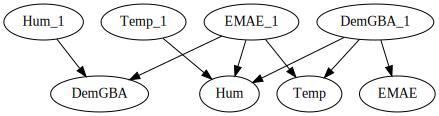

In [ ]:
np.random.seed(42)

def random(df):
  var_count = len(df.columns)
  arcos = []

  for src_idx in range(var_count):
      src = df.columns[src_idx]
      for dst_idx in range(var_count):
          dst = df.columns[dst_idx]
          if np.random.rand() > 0.5:
              arcos.append((f'{src}_1',dst))

  graph = (set(df.columns),set(arcos))
  return graph

dot = plot_graph(random(df))
dot.format = 'png'
dot.view(filename='PC_hourly', directory='./')
assert os.path.exists('PC_hourly.png')
display(dot)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!cp *png /content/gdrive/MyDrive/tmp_results_from_colab/

In [ ]:
dot.view?

## Diff

### DirectLiNGAM

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


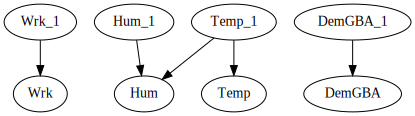

In [ ]:
import lingam
import numpy as np
import os

def DirectLINGAM(df):
    # adding lagged vars
    df_lag = df.iloc[:-1,:]
    df_nlag = df.iloc[1:,:]
    df = pd.DataFrame(np.hstack([df_nlag, df_lag]), columns=list(df.columns)+[f'{elem}_1' for elem in df.columns])

    # adding prior knowledge to model
    cant_var = df.shape[1]
    priori = np.zeros(shape=(cant_var,cant_var))
    priori[:int(cant_var/2),int(cant_var/2):] = np.ones(shape=(int(cant_var/2),int(cant_var/2)))*-1
    model = lingam.DirectLiNGAM(random_state=1, prior_knowledge=priori)

    # fit and save edges
    arcos = []
    model.fit(df)
    for row_idx, row in enumerate(model.adjacency_matrix_):
        dst = df.columns[row_idx]
        for column_idx, elem in enumerate(row):
            if elem!=0:
                src = df.columns[column_idx]
                arcos.append((src,dst))

    #should not exists edges from future to past Xi:1 -> Xj (beacuse was informed as prior)
    assert len([(src,dst) for (src,dst) in arcos if not '_' in src and '_' in dst  ])==0

    # eliminamos arcos contemporaneos en el pasado(Xj:1->Xi:1) y presente (Xq -> Xp)
    arcos = [(src,dst) for (src,dst) in arcos if not '_' in dst and '_' in src]


    graph = (set(df.columns),set(arcos))
    return graph
# df_cycle = df.copy()
# for column in df_cycle.columns:
#     df_cycle[column] = sm.tsa.filters.hpfilter(df_cycle[column], 129600)[0]

dot = plot_graph(DirectLINGAM(df_diff))
dot.format = 'pdf'
dot.view(filename='DLINGAM_hourly', directory='./')
assert os.path.exists('DLINGAM_hourly.pdf')
display(dot)

### PCMCI

/usr/local/lib/python3.7/dist-packages/tigramite/independence_tests/gpdc.py:16: UserWarning: No module named 'dcor'
  warnings.warn(str(e))
/usr/local/lib/python3.7/dist-packages/tigramite/independence_tests/gpdc_torch.py:18: UserWarning: No module named 'dcor'
  warnings.warn(str(e))


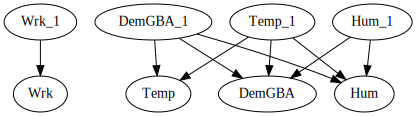

In [ ]:
from tigramite.pcmci import PCMCI
from tigramite.independence_tests.parcorr import ParCorr
import tigramite.data_processing as pp

def pcmci(df):
    t_df = pp.DataFrame(df.values,var_names=df.columns)
    cond_ind_test = ParCorr()
    pcmci = PCMCI(dataframe=t_df, cond_ind_test=cond_ind_test)
    results = pcmci.run_pcmci(tau_max=1, pc_alpha=None)

    var_count = len(df.columns)
    arcos = []
    m = results['p_matrix']
    for src_idx in range(var_count):
        src = df.columns[src_idx]
        for dst_idx in range(var_count):
            dst = df.columns[dst_idx]
    #                         if m[src_idx,dst_idx,0]<0.05: #src -> dst
    #                             arcos.append((src,dst))
            if m[src_idx,dst_idx,1]<0.05: #src:1 -> dst
                arcos.append((f'{src}_1',dst))

    graph = (set(df.columns),set(arcos))
    return graph

# Save as svg file
dot = plot_graph(pcmci(df_diff))
dot.format = 'pdf'
dot.view(filename='PCMCI_hourly', directory='./')
assert os.path.exists('PCMCI_hourly.pdf')
display(dot)

### VAR

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


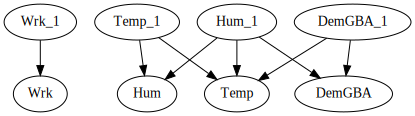

In [ ]:
# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic


def var(df, lag=1):
    model = VAR(df)
    model_fitted = model.fit(lag)

    nodes = [elem for elem in model_fitted.pvalues.columns] + [f'{elem}_1' for elem in model_fitted.pvalues.columns]
    arcos = []
    for row in range(1,len(model_fitted.pvalues)):
        src = model_fitted.pvalues.index[row]
        for column in range(len(model_fitted.pvalues.columns)):
            dst = model_fitted.pvalues.columns[column]
            if model_fitted.pvalues.iloc[row,column] < 0.05:
                arcos.append((src,dst))
    arcos = [(f"{src.replace('L1.','')}_1" ,dst) for src,dst in arcos]

    graph = (set(nodes), set(arcos))
    return graph

dot = plot_graph(var(df_diff))
dot.format = 'pdf'
dot.view(filename='VAR_hourly', directory='./')
assert os.path.exists('VAR_hourly.pdf')
display(dot)

### PC

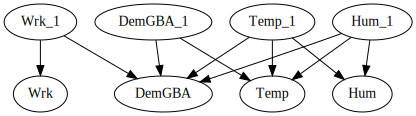

In [ ]:
from tigramite.pcmci import PCMCI
from tigramite.independence_tests.parcorr import ParCorr
import tigramite.data_processing as pp

def pc(df):
        t_df = pp.DataFrame(df.values,var_names=df.columns)
        cond_ind_test = ParCorr()
        pcmci = PCMCI(dataframe=t_df, cond_ind_test=cond_ind_test)
        all_parents = pcmci.run_pc_stable(tau_max=1, pc_alpha=None)

        var_count = len(df.columns)
        arcos = []

        for dst_idx in range(var_count):
            dst = df.columns[dst_idx]
            for parent in all_parents[dst_idx]:
                src_idx,lag = parent
                assert lag==-1
                src = df.columns[src_idx]
                arcos.append((f'{src}_1',dst))
#                     for dst_idx in range(var_count):
#                         dst = df.columns[dst_idx]
# #                         if m[src_idx,dst_idx,0]<0.05: #src -> dst
# #                             arcos.append((src,dst))
#                         if m[src_idx,dst_idx,1]<0.05: #src:1 -> dst


        graph = (set(df.columns),set(arcos))
        return graph

dot = plot_graph(pc(df_diff))
dot.format = 'pdf'
dot.view(filename='PC_hourly', directory='./')
assert os.path.exists('PC_hourly.pdf')
display(dot)

### RANDOM

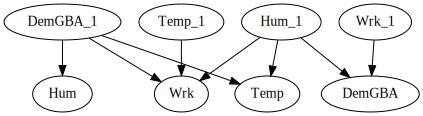

In [ ]:
np.random.seed(42)

def random(df):
  var_count = len(df.columns)
  arcos = []

  for src_idx in range(var_count):
      src = df.columns[src_idx]
      for dst_idx in range(var_count):
          dst = df.columns[dst_idx]
          if np.random.rand() > 0.5:
              arcos.append((f'{src}_1',dst))

  graph = (set(df.columns),set(arcos))
  return graph

dot = plot_graph(random(df))
dot.format = 'png'
dot.view(filename='PC_hourly', directory='./')
assert os.path.exists('PC_hourly.png')
display(dot)

## TREND


### DirectLiNGAM

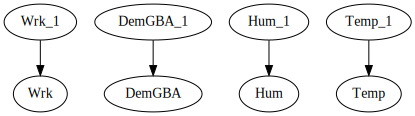

In [ ]:
import lingam
import numpy as np
import os

def DirectLINGAM(df):
    # adding lagged vars
    df_lag = df.iloc[:-1,:]
    df_nlag = df.iloc[1:,:]
    df = pd.DataFrame(np.hstack([df_nlag, df_lag]), columns=list(df.columns)+[f'{elem}_1' for elem in df.columns])

    # adding prior knowledge to model
    cant_var = df.shape[1]
    priori = np.zeros(shape=(cant_var,cant_var))
    priori[:int(cant_var/2),int(cant_var/2):] = np.ones(shape=(int(cant_var/2),int(cant_var/2)))*-1
    model = lingam.DirectLiNGAM(random_state=1, prior_knowledge=priori)

    # fit and save edges
    arcos = []
    model.fit(df)
    for row_idx, row in enumerate(model.adjacency_matrix_):
        dst = df.columns[row_idx]
        for column_idx, elem in enumerate(row):
            if elem!=0:
                src = df.columns[column_idx]
                arcos.append((src,dst))

    #should not exists edges from future to past Xi:1 -> Xj (beacuse was informed as prior)
    assert len([(src,dst) for (src,dst) in arcos if not '_' in src and '_' in dst  ])==0

    # eliminamos arcos contemporaneos en el pasado(Xj:1->Xi:1) y presente (Xq -> Xp)
    arcos = [(src,dst) for (src,dst) in arcos if not '_' in dst and '_' in src]


    graph = (set(df.columns),set(arcos))
    return graph
# df_cycle = df.copy()
# for column in df_cycle.columns:
#     df_cycle[column] = sm.tsa.filters.hpfilter(df_cycle[column], 129600)[0]

dot = plot_graph(DirectLINGAM(df_trend))
dot.format = 'pdf'
dot.view(filename='DLINGAM_hourly', directory='./')
assert os.path.exists('DLINGAM_hourly.pdf')
display(dot)

### PCMCI

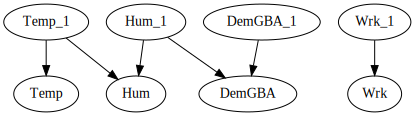

In [ ]:
from tigramite.pcmci import PCMCI
from tigramite.independence_tests.parcorr import ParCorr
import tigramite.data_processing as pp

def pcmci(df):
    t_df = pp.DataFrame(df.values,var_names=df.columns)
    cond_ind_test = ParCorr()
    pcmci = PCMCI(dataframe=t_df, cond_ind_test=cond_ind_test)
    results = pcmci.run_pcmci(tau_max=1, pc_alpha=None)

    var_count = len(df.columns)
    arcos = []
    m = results['p_matrix']
    for src_idx in range(var_count):
        src = df.columns[src_idx]
        for dst_idx in range(var_count):
            dst = df.columns[dst_idx]
    #                         if m[src_idx,dst_idx,0]<0.05: #src -> dst
    #                             arcos.append((src,dst))
            if m[src_idx,dst_idx,1]<0.05: #src:1 -> dst
                arcos.append((f'{src}_1',dst))

    graph = (set(df.columns),set(arcos))
    return graph

# Save as svg file
dot = plot_graph(pcmci(df_trend))
dot.format = 'pdf'
dot.view(filename='PCMCI_hourly', directory='./')
assert os.path.exists('PCMCI_hourly.pdf')
display(dot)

### VAR

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


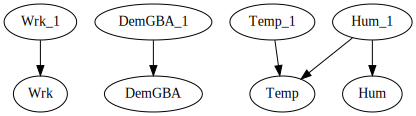

In [ ]:
# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic


def var(df, lag=1):
    model = VAR(df)
    model_fitted = model.fit(lag)

    nodes = [elem for elem in model_fitted.pvalues.columns] + [f'{elem}_1' for elem in model_fitted.pvalues.columns]
    arcos = []
    for row in range(1,len(model_fitted.pvalues)):
        src = model_fitted.pvalues.index[row]
        for column in range(len(model_fitted.pvalues.columns)):
            dst = model_fitted.pvalues.columns[column]
            if model_fitted.pvalues.iloc[row,column] < 0.05:
                arcos.append((src,dst))
    arcos = [(f"{src.replace('L1.','')}_1" ,dst) for src,dst in arcos]

    graph = (set(nodes), set(arcos))
    return graph

dot = plot_graph(var(df_trend))
dot.format = 'pdf'
dot.view(filename='VAR_hourly', directory='./')
assert os.path.exists('VAR_hourly.pdf')
display(dot)

### PC

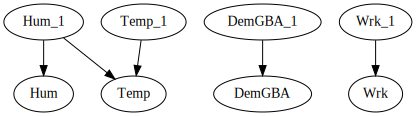

In [ ]:
from tigramite.pcmci import PCMCI
from tigramite.independence_tests.parcorr import ParCorr
import tigramite.data_processing as pp

def pc(df):
        t_df = pp.DataFrame(df.values,var_names=df.columns)
        cond_ind_test = ParCorr()
        pcmci = PCMCI(dataframe=t_df, cond_ind_test=cond_ind_test)
        all_parents = pcmci.run_pc_stable(tau_max=1, pc_alpha=None)

        var_count = len(df.columns)
        arcos = []

        for dst_idx in range(var_count):
            dst = df.columns[dst_idx]
            for parent in all_parents[dst_idx]:
                src_idx,lag = parent
                assert lag==-1
                src = df.columns[src_idx]
                arcos.append((f'{src}_1',dst))
#                     for dst_idx in range(var_count):
#                         dst = df.columns[dst_idx]
# #                         if m[src_idx,dst_idx,0]<0.05: #src -> dst
# #                             arcos.append((src,dst))
#                         if m[src_idx,dst_idx,1]<0.05: #src:1 -> dst


        graph = (set(df.columns),set(arcos))
        return graph

dot = plot_graph(pc(df_trend))
dot.format = 'pdf'
dot.view(filename='PC_hourly', directory='./')
assert os.path.exists('PC_hourly.pdf')
display(dot)

### RANDOM

## RESIDUALS

### DirectLiNGAM

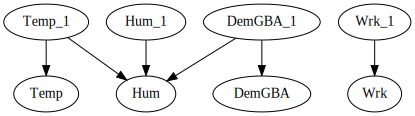

In [ ]:
import lingam
import numpy as np
import os

def DirectLINGAM(df):
    # adding lagged vars
    df_lag = df.iloc[:-1,:]
    df_nlag = df.iloc[1:,:]
    df = pd.DataFrame(np.hstack([df_nlag, df_lag]), columns=list(df.columns)+[f'{elem}_1' for elem in df.columns])

    # adding prior knowledge to model
    cant_var = df.shape[1]
    priori = np.zeros(shape=(cant_var,cant_var))
    priori[:int(cant_var/2),int(cant_var/2):] = np.ones(shape=(int(cant_var/2),int(cant_var/2)))*-1
    model = lingam.DirectLiNGAM(random_state=1, prior_knowledge=priori)

    # fit and save edges
    arcos = []
    model.fit(df)
    for row_idx, row in enumerate(model.adjacency_matrix_):
        dst = df.columns[row_idx]
        for column_idx, elem in enumerate(row):
            if elem!=0:
                src = df.columns[column_idx]
                arcos.append((src,dst))

    #should not exists edges from future to past Xi:1 -> Xj (beacuse was informed as prior)
    assert len([(src,dst) for (src,dst) in arcos if not '_' in src and '_' in dst  ])==0

    # eliminamos arcos contemporaneos en el pasado(Xj:1->Xi:1) y presente (Xq -> Xp)
    arcos = [(src,dst) for (src,dst) in arcos if not '_' in dst and '_' in src]


    graph = (set(df.columns),set(arcos))
    return graph
# df_cycle = df.copy()
# for column in df_cycle.columns:
#     df_cycle[column] = sm.tsa.filters.hpfilter(df_cycle[column], 129600)[0]

dot = plot_graph(DirectLINGAM(df_res))
dot.format = 'pdf'
dot.view(filename='DLINGAM_hourly', directory='./')
assert os.path.exists('DLINGAM_hourly.pdf')
display(dot)

### PCMCI

/usr/local/lib/python3.7/dist-packages/tigramite/independence_tests/gpdc.py:16: UserWarning: No module named 'dcor'
  warnings.warn(str(e))
/usr/local/lib/python3.7/dist-packages/tigramite/independence_tests/gpdc_torch.py:18: UserWarning: No module named 'dcor'
  warnings.warn(str(e))


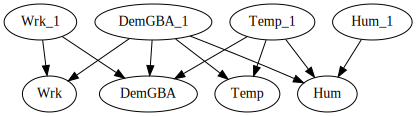

In [ ]:
from tigramite.pcmci import PCMCI
from tigramite.independence_tests.parcorr import ParCorr
import tigramite.data_processing as pp

def pcmci(df):
    t_df = pp.DataFrame(df.values,var_names=df.columns)
    cond_ind_test = ParCorr()
    pcmci = PCMCI(dataframe=t_df, cond_ind_test=cond_ind_test)
    results = pcmci.run_pcmci(tau_max=1, pc_alpha=None)

    var_count = len(df.columns)
    arcos = []
    m = results['p_matrix']
    for src_idx in range(var_count):
        src = df.columns[src_idx]
        for dst_idx in range(var_count):
            dst = df.columns[dst_idx]
    #                         if m[src_idx,dst_idx,0]<0.05: #src -> dst
    #                             arcos.append((src,dst))
            if m[src_idx,dst_idx,1]<0.05: #src:1 -> dst
                arcos.append((f'{src}_1',dst))

    graph = (set(df.columns),set(arcos))
    return graph

# Save as svg file
dot = plot_graph(pcmci(df_res))
dot.format = 'pdf'
dot.view(filename='PCMCI_hourly', directory='./')
assert os.path.exists('PCMCI_hourly.pdf')
display(dot)

### VAR

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


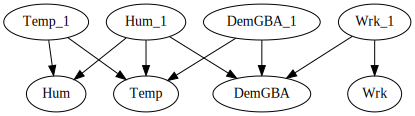

In [ ]:
# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic


def var(df, lag=1):
    model = VAR(df)
    model_fitted = model.fit(lag)

    nodes = [elem for elem in model_fitted.pvalues.columns] + [f'{elem}_1' for elem in model_fitted.pvalues.columns]
    arcos = []
    for row in range(1,len(model_fitted.pvalues)):
        src = model_fitted.pvalues.index[row]
        for column in range(len(model_fitted.pvalues.columns)):
            dst = model_fitted.pvalues.columns[column]
            if model_fitted.pvalues.iloc[row,column] < 0.05:
                arcos.append((src,dst))
    arcos = [(f"{src.replace('L1.','')}_1" ,dst) for src,dst in arcos]

    graph = (set(nodes), set(arcos))
    return graph

dot = plot_graph(var(df_res))
dot.format = 'pdf'
dot.view(filename='VAR_hourly', directory='./')
assert os.path.exists('VAR_hourly.pdf')
display(dot)

### PC

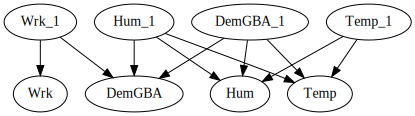

In [ ]:
from tigramite.pcmci import PCMCI
from tigramite.independence_tests.parcorr import ParCorr
import tigramite.data_processing as pp

def pc(df):
        t_df = pp.DataFrame(df.values,var_names=df.columns)
        cond_ind_test = ParCorr()
        pcmci = PCMCI(dataframe=t_df, cond_ind_test=cond_ind_test)
        all_parents = pcmci.run_pc_stable(tau_max=1, pc_alpha=None)

        var_count = len(df.columns)
        arcos = []

        for dst_idx in range(var_count):
            dst = df.columns[dst_idx]
            for parent in all_parents[dst_idx]:
                src_idx,lag = parent
                assert lag==-1
                src = df.columns[src_idx]
                arcos.append((f'{src}_1',dst))
#                     for dst_idx in range(var_count):
#                         dst = df.columns[dst_idx]
# #                         if m[src_idx,dst_idx,0]<0.05: #src -> dst
# #                             arcos.append((src,dst))
#                         if m[src_idx,dst_idx,1]<0.05: #src:1 -> dst


        graph = (set(df.columns),set(arcos))
        return graph

dot = plot_graph(pc(df_res))
dot.format = 'pdf'
dot.view(filename='PC_hourly', directory='./')
assert os.path.exists('PC_hourly.pdf')
display(dot)

## GROUND TRUTH

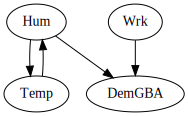

In [ ]:
from graphviz import Digraph
edges = {('Wrk_1','Wrk'),('Hum_1',"Hum"), ('DemGBA_1', 'DemGBA'), ('Temp_1', 'Temp'), ('Wrk_1', 'DemGBA'), ('Hum_1', 'Temp'),('Temp_1','Hum'),('Hum_1','DemGBA')}
def filter_lags(edges):
  return set([(src.replace('_1',''),dst) for (src,dst) in edges if src.replace('_1','' )!=dst])
edges = filter_lags(edges)

# Create Digraph object
dot = Digraph()

# for node in nodes:
#     dot.node(node)
for edge in edges:
  dot.edge(edge[0],edge[1])
# dot.edges(edges)
dot
# return dot
dot.render('correct-edges.gv', view=True)
dot

### GROUND TRUTH (INCORRECTS)

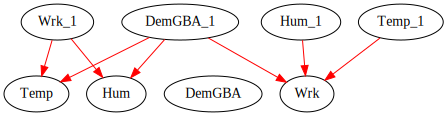

In [ ]:
from graphviz import Digraph

dot = Digraph()

for edge in {('Wrk_1','Temp'),('Wrk_1','Hum'), ('DemGBA_1','Temp'), ('DemGBA_1','Hum'), ('DemGBA_1','Wrk'), ('Hum_1','Wrk'), ('Temp_1','Wrk')}:
  dot.edge(edge[0],edge[1], color="red")

dot.edge('DemGBA_1', 'DemGBA',color='transparent')
dot.render('incorrect-edges.gv', view=True)
dot

## Más lags

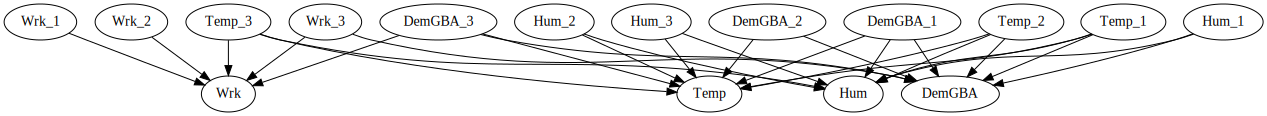

In [ ]:
from tigramite.pcmci import PCMCI
from tigramite.independence_tests.parcorr import ParCorr
import tigramite.data_processing as pp

def pcmci(df,tau_max=3):
    t_df = pp.DataFrame(df.values,var_names=df.columns)
    cond_ind_test = ParCorr()
    pcmci = PCMCI(dataframe=t_df, cond_ind_test=cond_ind_test)
    results = pcmci.run_pcmci(tau_max=tau_max, pc_alpha=None)

    var_count = len(df.columns)
    arcos = []
    m = results['p_matrix']
    # return m
    for src_idx in range(var_count):
        src = df.columns[src_idx]
        for dst_idx in range(var_count):
            dst = df.columns[dst_idx]
    #                         if m[src_idx,dst_idx,0]<0.05: #src -> dst
    #                             arcos.append((src,dst))
            for lag in range(1,tau_max+1):
              if m[src_idx,dst_idx,lag]<0.05: #src:1 -> dst
                  arcos.append((f'{src}_{lag}',dst))

    graph = (set(df.columns),set(arcos))
    return graph
# m = pcmci(df_trend)
# Save as svg file
dot = plot_graph(pcmci(df_trend))
dot.format = 'pdf'
dot.view(filename='PCMCI_hourly', directory='./')
assert os.path.exists('PCMCI_hourly.pdf')
display(dot)

In [ ]:
m.shape

(4, 4, 11)